#Tarea Nº 3

Diabetes dataset: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

##Preparación de los datos


In [ ]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creamos el dataframe
df = pd.read_csv('diabetes.csv')

In [ ]:
# Mostramos lo que contiene el dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Según se pudo ver en la página de Kaggle, el diagnóstico positivo de diabetes está marcado por '1' y el diagnóstico negativo está marcado por un '0' en la columna 'Outcome'

In [ ]:
# Obtenemos la información del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Seleccionamos las columnas que se usarán para las variables X, y
y = df['Outcome']
X = df.drop('Outcome', axis=1)

In [ ]:
#Visualizamos X, y
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


##División en Training y Test

In [ ]:
# Importamos la librería necesaria para dividir el dataset
from sklearn.model_selection import train_test_split

In [ ]:
#Dividimos el dataset con un 15% de tamaño de muestra para test
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.15, random_state=42)

In [ ]:
#Definición del modelo de Regresión Logística
model = LogisticRegression(penalty = 'none', random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Visualizamos las variables
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0])

In [ ]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
728    0
49     0
662    1
411    0
605    0
Name: Outcome, Length: 116, dtype: int64

##Matriz de confusión y métricas de evaluación

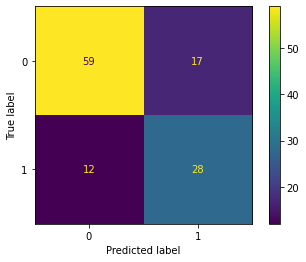

In [ ]:
# Se importa la librería para la matriz de confusión
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
# Creación de la matriz de confusión
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)
disp.plot()

In [ ]:
# Se importa la librería para el análisis de métricas
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        76
           1       0.62      0.70      0.66        40

    accuracy                           0.75       116
   macro avg       0.73      0.74      0.73       116
weighted avg       0.76      0.75      0.75       116



###Criterio para evaluar la eficiencia del análisis

En este caso de estudio, lo conveniente es tener menos falsos negativos, pues es conveniente decirle a un paciente que sí tiene, cuando en realidad no lo tiene a decirle que no tiene diabetes cuando en realidad sí lo tiene.

*Mediante la matriz obtenida podemos ver que la cantidad de falsos negativos es de 12, la menor de todos los modelos*

##Análisis con SVM

In [ ]:
# Se importa la librería para aplicar SVM
from sklearn.svm import SVC

In [ ]:
#Creación del modelo con SVM
model = SVC(C = 0.5 , gamma = 'scale', kernel = 'poly', random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0])

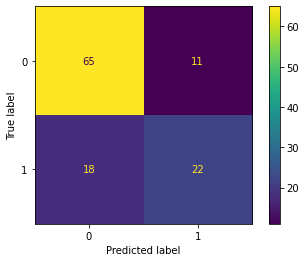

In [ ]:
#Matriz de confusión
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)
disp.plot()

In [ ]:
#Métricas de evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        76
           1       0.67      0.55      0.60        40

    accuracy                           0.75       116
   macro avg       0.72      0.70      0.71       116
weighted avg       0.74      0.75      0.74       116



###Criterio para evaluar la eficiencia del análisis -> SVM


*Mediante la matriz obtenida podemos ver que la cantidad de falsos negativos es de 18, una cantidad mayor a la de los falsos positivos, no es un buen modelo para el criterio que estamos aplicando*

##Análisis con KNN

In [ ]:
# Se importa la librería de KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Se crea el modelo con KNN
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

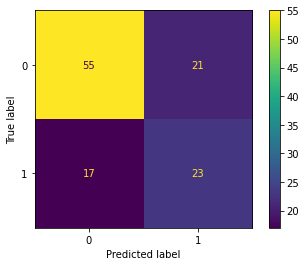

In [ ]:
#Matriz de confusión
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)
disp.plot()

In [ ]:
#Métricas de evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        76
           1       0.52      0.57      0.55        40

    accuracy                           0.67       116
   macro avg       0.64      0.65      0.65       116
weighted avg       0.68      0.67      0.68       116



###Criterio para evaluar la eficiencia del análisis


*En este caso mediante la matriz obtenida podemos ver que la cantidad de falsos negativos es de 17, una cantidad menor a la de los falsos positivos. A pesar de ser menor, sigue siendo una cantidad significativa de falsos negativos*

##Análisis con Random Forest Classifier

In [ ]:
# Se importa la librería de Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creación del modelo con Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth = None, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

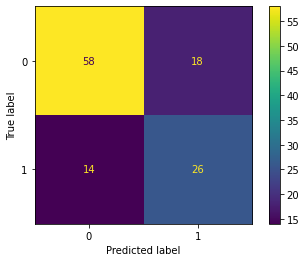

In [ ]:
# Matriz de Confusión
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)
disp.plot()

In [ ]:
#Métricas de evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        76
           1       0.59      0.65      0.62        40

    accuracy                           0.72       116
   macro avg       0.70      0.71      0.70       116
weighted avg       0.73      0.72      0.73       116



###Criterio para evaluar la eficiencia del análisis -> Random Forest Classifier


*Mediante la matriz obtenida podemos ver que la cantidad de falsos negativos es de 14, una cantidad menor a la de los falsos positivos*

##Evaluación del mejor modelo

Según los resultados obtenidos, se puede ver que el modelo que obtuvo mejor resultado bajo el criterio de obtener la menor cantidad de falsos negativos, es el modelo de Regresión Logística, el segundo mejor modelo es Random Forest Classifier
